In [122]:
import numpy as np
import pandas as pd

In [123]:
data = pd.read_csv('./datasets/spambase_balance.csv')

In [124]:
data.shape

(3626, 58)

<AxesSubplot:>

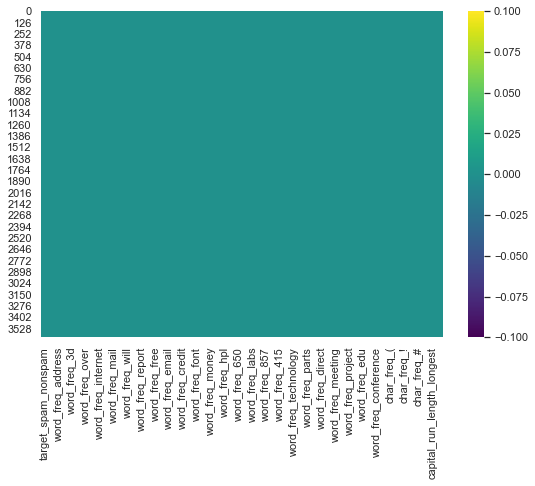

In [125]:
import seaborn as sns
sns.set(rc={"figure.figsize":(9, 6)})
sns.heatmap(data.isnull(), cmap='viridis')

In [126]:
data.isnull()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3624,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

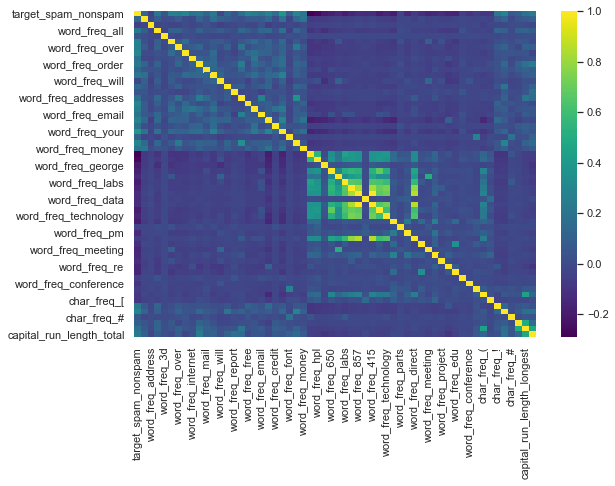

In [127]:
sns.heatmap(data.corr(), cmap='viridis')

In [128]:
corr = data.corr()

In [129]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [130]:
selected_columns = data.columns[columns]
selected_columns.shape

(57,)

In [131]:
data = data[selected_columns]

In [132]:
selected_columns

Index(['target_spam_nonspam', 'word_freq_make', 'word_freq_address',
       'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
       'word_freq_remove', 'word_freq_internet', 'word_freq_order',
       'word_freq_mail', 'word_freq_receive', 'word_freq_will',
       'word_freq_people', 'word_freq_report', 'word_freq_addresses',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font',
       'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
       'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_confere

In [133]:
selected_columns = selected_columns[1:].values         # Removing the dignosis column

In [134]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [135]:
data.iloc[:,0]

0       1
1       1
2       1
3       1
4       1
       ..
3621    0
3622    0
3623    0
3624    0
3625    0
Name: target_spam_nonspam, Length: 3626, dtype: int64

In [136]:
#https://vishalramesh.substack.com/p/feature-selection-correlation-and-p-value-da8921bfb3cf?r=9u6n7&s=w&utm_campaign=post&utm_medium=web

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [137]:
selected_columns

array(['word_freq_make', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
       'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_people',
       'word_freq_free', 'word_freq_business', 'word_freq_email',
       'word_freq_you', 'word_freq_credit', 'word_freq_your',
       'word_freq_font', 'word_freq_000', 'word_freq_money',
       'word_freq_hp', 'word_freq_hpl', 'word_freq_labs', 'word_freq_85',
       'word_freq_technology', 'word_freq_pm', 'word_freq_meeting',
       'word_freq_project', 'word_freq_re', 'word_freq_edu',
       'word_freq_table', 'char_freq_;', 'char_freq_(', 'char_freq_!',
       'char_freq_$', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total'],
      dtype=object)

In [138]:
result = pd.DataFrame()
result['target_spam_nonspam'] = data.iloc[:,0]

In [139]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data.shape

(3626, 37)

In [140]:
data.values

array([[0.000e+00, 6.400e-01, 0.000e+00, ..., 3.756e+00, 6.100e+01,
        2.780e+02],
       [2.100e-01, 5.000e-01, 0.000e+00, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 7.100e-01, 0.000e+00, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       ...,
       [1.500e-01, 6.300e-01, 0.000e+00, ..., 1.111e+00, 7.000e+00,
        3.890e+02],
       [0.000e+00, 1.140e+00, 0.000e+00, ..., 1.833e+00, 5.000e+00,
        2.200e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.038e+00, 1.400e+01,
        5.300e+01]])

In [141]:
result.values

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2, random_state=101)

In [143]:
print('The X_train: {}, y_train shape: {}'.format(x_train.shape, y_train.shape))
print('The X_test: {},  y_test  shape: {}'.format(x_train.shape, y_train.shape))

The X_train: (2900, 37), y_train shape: (2900, 1)
The X_test: (2900, 37),  y_test  shape: (2900, 1)


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)


pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('logisticRegression')

D:\x-20a\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [145]:
list_scores

[0.9173553719008265]

## Statsmodels

In [146]:
import statsmodels.api as sm

logitReg = sm.Logit(y_train, x_train)
logit_fit = logitReg.fit()

Optimization terminated successfully.
         Current function value: 0.281660
         Iterations 12


In [147]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2863
Method:                           MLE   Df Model:                           36
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.5936
Time:                        22:51:47   Log-Likelihood:                -816.81
converged:                       True   LL-Null:                       -2010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7245      0.243     -2.987      0.003      -1.200      -0.249
x2            -0.1770      0.123     -1.442      0.149      -0.417       0.064
x3             1.6219      1.306      1.241      0.214      -0.939       4.182
x4             0.5516      0.132      4.191      0.000       0.294       0.810
x5             0.6387      0.288      2.220      0.026       0.075       1.203
x6             2.1860      0.387      5.650      0.000       1.428       2.944
x7             0.3060      0.141      2.178      0.029       0.031       0.581
x8             0.7552      0.329      2.295      0.022       0.110       1.400
x9             0.0018      0.078      0.023      0.982      -0.150       0.154
x10           -0.3204      0.226     -1.420      0.156      -0.763       0.122
x11            1.0005      0.179      5.580      0.000       0.649       1.352
x12            0.6923      0.234      2.954      0.003       0.233       1.152
x13            0.0720      0.125      0.576      0.564      -0.173       0.317
x14           -0.1251      0.036     -3.429      0.001      -0.197      -0.054
x15            2.5712      0.772      3.331      0.001       1.058       4.084
x16            0.1891      0.057      3.322      0.001       0.078       0.301
x17            0.3975      0.182      2.188      0.029       0.041       0.754
x18            2.3639      0.591      4.002      0.000       1.206       3.521
x19            0.6746      0.308      2.192      0.028       0.071       1.278
x20           -1.7100      0.306     -5.587      0.000      -2.310      -1.110
x21           -1.7390      0.499     -3.482      0.000      -2.718      -0.760
x22           -1.1186      0.574     -1.948      0.051      -2.244       0.007
x23           -2.6742      0.782     -3.419      0.001      -4.207      -1.141
x24            0.4471      0.357      1.251      0.211      -0.253       1.147
x25           -1.1640      0.416     -2.800      0.005      -1.979      -0.349
x26           -3.0444      0.862     -3.531      0.000      -4.734      -1.354
x27           -3.2420      0.754     -4.298      0.000      -4.720      -1.764
x28           -0.9546      0.155     -6.147      0.000      -1.259      -0.650
x29           -1.5982      0.299     -5.343      0.000      -2.185      -1.012
x30           -4.4683      2.409     -1.855      0.064      -9.189       0.253
x31           -1.6124      0.603     -2.672      0.008      -2.795      -0.430
x32           -1.0116      0.333     -3.042      0.002      -1.663      -0.360
x33            0.2304      0.056      4.107      0.000       0.120       0.340
x34            6.1477      0.940      6.540      0.000       4.305       7.990
x35           -0.0068      0.004     -1.525      0.127      -0.015       0.002
x36            0.0021      0.001      1.545      0.122      -0.001       0.005
x37            0.0002      0.000      1.555      0.120   -5.67e-05       0.000
==============================================================================

P